<a href="https://colab.research.google.com/github/agbenge/pytest-tips/blob/main/Doing_Data_Science_Your_First_Day.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ingest

In [1]:
!python --version
!pip install plotly
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')
df.head()

Python 3.10.12


,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [2]:
df.tail()

,date,state,fips,cases,deaths
61937,2023-03-23,Virginia,51,2298300,23782
61938,2023-03-23,Washington,53,1940704,15905
61939,2023-03-23,West Virginia,54,645710,8132
61940,2023-03-23,Wisconsin,55,2014524,16485
61941,2023-03-23,Wyoming,56,185800,2014


In [3]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [4]:
df.shape

(61942, 5)

#EDA

In [5]:
df.describe()

,fips,cases,deaths
count,61942.000000,6.194200e+04,61942.000000
mean,32.247958,8.898301e+05,11779.067499
std,18.788383,1.470231e+06,17345.774849
min,1.000000,1.000000e+00,0.000000
25%,17.000000,7.078350e+04,1171.000000
50%,31.000000,3.514960e+05,5035.000000
75%,46.000000,1.043231e+06,14912.000000
max,78.000000,1.216916e+07,104277.000000


<Axes: xlabel='cases', ylabel='deaths'>

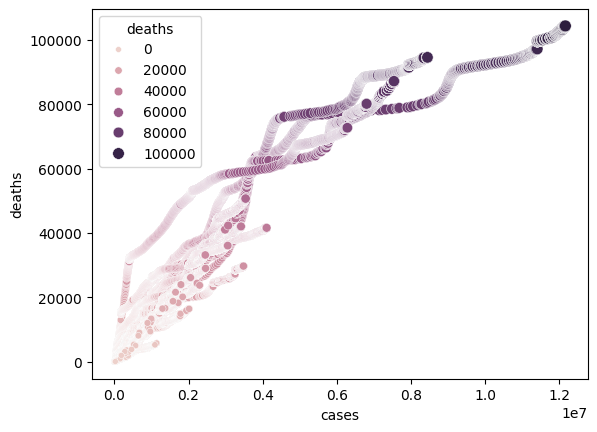

In [6]:
import seaborn as sns
sns.scatterplot(data=df,  y="deaths", x='cases', hue="deaths" ,size="deaths")

Dates

In [7]:
df =pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')
df["date"] = pd.to_datetime(df["date"])
df=df.set_index("date")
print("Cloumns: {df.columns}")
df.index

Cloumns: {df.columns}


DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-24', '2020-01-25', '2020-01-25', '2020-01-25',
               '2020-01-26', '2020-01-26',
               ...
               '2023-03-23', '2023-03-23', '2023-03-23', '2023-03-23',
               '2023-03-23', '2023-03-23', '2023-03-23', '2023-03-23',
               '2023-03-23', '2023-03-23'],
              dtype='datetime64[ns]', name='date', length=61942, freq=None)

In [8]:
from datetime import datetime, timedelta
today = datetime.today()
daybefore=today-timedelta(days=2)
print(f"Today {today}")
print(f"Two days ago {daybefore}")

Today 2024-11-16 10:56:25.955909
Two days ago 2024-11-14 10:56:25.955909


In [9]:
df.loc[daybefore:today].head()

,state,fips,cases,deaths
date,,,,


In [10]:
current_df= df.loc[daybefore:today].sort_values(by=["date", "cases"], ascending=False)
current_df.head(10)

,state,fips,cases,deaths
date,,,,


In [11]:
top_ten_state= list(df.sort_values(by=["date", "cases"], ascending=False)["state"])[:10]
top_ten_state


['California',
 'Texas',
 'Florida',
 'New York',
 'Illinois',
 'Pennsylvania',
 'North Carolina',
 'Ohio',
 'Michigan',
 'New Jersey']

In [12]:

top_state_df=df[df['state'].isin(top_ten_state)].drop(columns="fips")
top_state_df.head()

,state,cases,deaths
date,,,
2020-01-24,Illinois,1,0
2020-01-25,California,1,0
2020-01-25,Illinois,1,0
2020-01-26,California,2,0
2020-01-26,Illinois,1,0


In [13]:
set(top_state_df.state.values)

{'California',
 'Florida',
 'Illinois',
 'Michigan',
 'New Jersey',
 'New York',
 'North Carolina',
 'Ohio',
 'Pennsylvania',
 'Texas'}

<Figure size 1500x500 with 0 Axes>

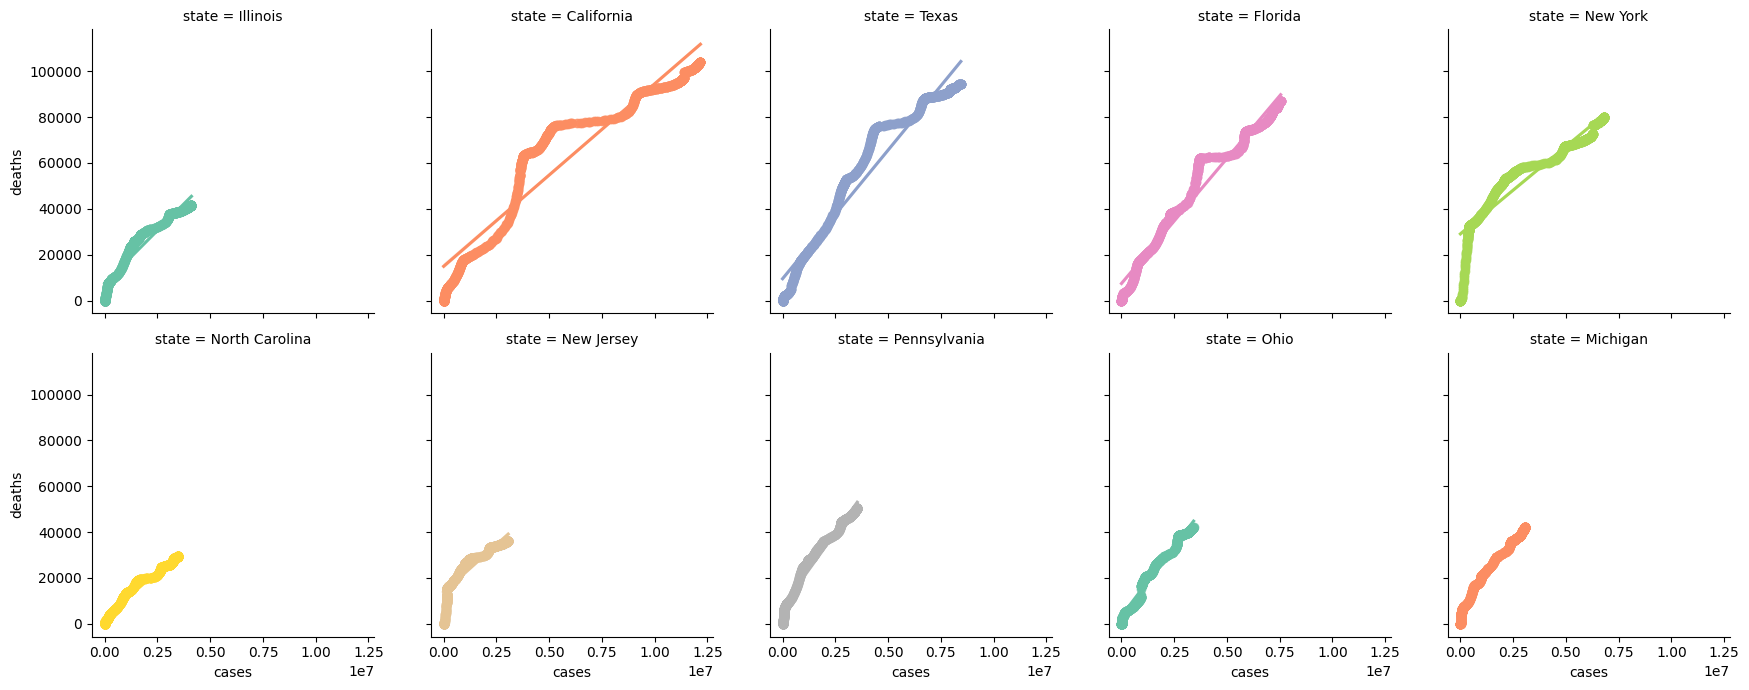

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
ax= sns.lmplot(
    x="cases",
    y="deaths",
    height=3.5,
    col="state",
    data=top_state_df,
   # fit_reg=False,
    hue="state",
    palette="Set2",
    col_wrap=5,

)
ax.fig.subplots_adjust(wspace=.2)

In [15]:
top_state_march_current_df= top_state_df.loc["2020-03-08": "2020-03-09"].sort_values(by=["date", "cases"], ascending=False)
top_state_march_current_df.head(10)

,state,cases,deaths
date,,,
2020-03-09,California,172,2
2020-03-09,New York,142,0
2020-03-09,Texas,24,0
2020-03-09,Florida,14,2
2020-03-09,Illinois,11,0
2020-03-09,New Jersey,11,0
2020-03-09,Pennsylvania,10,0
2020-03-09,North Carolina,7,0
2020-03-09,Ohio,3,0


In [16]:
!apt-get install plotly

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package plotly


In [17]:
import plotly.io  as pio
pio.renderers.default = "colab"
import plotly.express as px
fig= px.scatter(top_state_march_current_df, x= top_state_march_current_df.index, y="cases", size="deaths")
fig.show()

In [29]:
cdc_2013 = pd.read_csv("https://raw.githubusercontent.com/noahgift/sugar/refs/heads/master/data/education_sugar_cdc_2003.csv")
for column in cdc_2013.columns:
  cdc_2013[column] = cdc_2013[column].str.replace(r"\(.*\)","",  regex=True)
  cdc_2013[column] =  cdc_2013[column].apply(lambda x: pd.to_numeric(x, errors='coerce') if pd.to_numeric(x, errors='coerce') is  None else x)

cdc_2013.reset_index(inplace=True)
cdc_2013.rename(columns={"State": "state", "Employed": "employed-sugar-intake-daily"}, inplace=True)
cdc_2013.head()

,index,state,employed-sugar-intake-daily,Not employed,Retired,<High school,High school,Some college,College graduate
0,0,Alaska,26.2,32.1,16.0,47.1,34.9,24.2,12.9
1,1,Arizona,33.0,28.7,13.8,40.4,36.5,24.4,14.6
2,2,California,22.9,30.2,15.0,38.5,29.9,21.4,11.5
3,3,Connecticut,18.9,24.3,15.0,27.8,26.9,19.9,10.2
4,4,District of Columbia,18.5,34.6,18.5,45.6,39.0,28.9,8.4


In [30]:
cdc_employed_df= cdc_2013[["state", "employed-sugar-intake-daily"]]
cdc_employed_df.head()

,state,employed-sugar-intake-daily
0,Alaska,26.2
1,Arizona,33.0
2,California,22.9
3,Connecticut,18.9
4,District of Columbia,18.5


In [31]:
sugar_covid_df=df.merge(cdc_employed_df, on="state", how="inner")
sugar_covid_df.head()

,state,fips,cases,deaths,employed-sugar-intake-daily
0,California,6,1,0,22.9
1,Arizona,4,1,0,33.0
2,California,6,2,0,22.9
3,Arizona,4,1,0,33.0
4,California,6,2,0,22.9


In [32]:
election_df=pd.read_csv("https://raw.githubusercontent.com/paiml/minimal-python/refs/heads/master/data/2016-Electoral-Votes.csv")
election_df.rename(columns={"State": "state"}, inplace=True)
election_df.drop(columns="Votes", inplace=True)

bool_output=pd.get_dummies(election_df['Winning Party'])

election_df= pd.concat([ election_df, bool_output], axis=1)
election_df.head()


,state,Winning Party,Democrats,Republicans
0,Alabama,Republicans,False,True
1,Alaska,Republicans,False,True
2,Arizona,Republicans,False,True
3,Arkansas,Republicans,False,True
4,California,Democrats,True,False


In [22]:
sugar_covid_df=sugar_covid_df.merge(election_df, how="inner", on="state")
sugar_covid_df.head()

,state,fips,cases,deaths,employed-sugar-intake-daily,Winning Party,Democrats,Republicans
0,California,6,1,0,22.9,Democrats,True,False
1,Arizona,4,1,0,33.0,Republicans,False,True
2,California,6,2,0,22.9,Democrats,True,False
3,Arizona,4,1,0,33.0,Republicans,False,True
4,California,6,2,0,22.9,Democrats,True,False


In [28]:
sugar_covid_df.corr()


ValueError: could not convert string to float: 'California'

#modeling

In [33]:
import plotly.graph_objects as go

go.Figure(go.Scatter(x=sugar_covid_df["cases"], y=sugar_covid_df["deaths"]))


In [34]:
sugar_covid_df.to_csv("sugar_covid_df.csv")

#Summary